Program Input:
Enter the data values separated by spaces: 1 2 4 6 8 10 12 15 20 4
Enter the number of bins: 4

Program Output:
Original Data: [1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 15.0, 20.0, 4.0]
Equi-depth Bins: [[1.0, 2.0], [4.0, 4.0], [6.0, 8.0], [10.0, 12.0, 15.0, 20.0]]
Bins with Means: [[np.float64(1.5), np.float64(1.5)], [np.float64(4.0), np.float64(4.0)], [np.float64(7.0), np.float64(7.0)], [np.float64(14.25), np.float64(14.25), np.float64(14.25), np.float64(14.25)]]
Bins with Boundaries: [[1.0, 2.0], [4.0, 4.0], [6.0, 8.0], [10.0, 10.0, 20.0, 20.0]]

Visualization Graph:


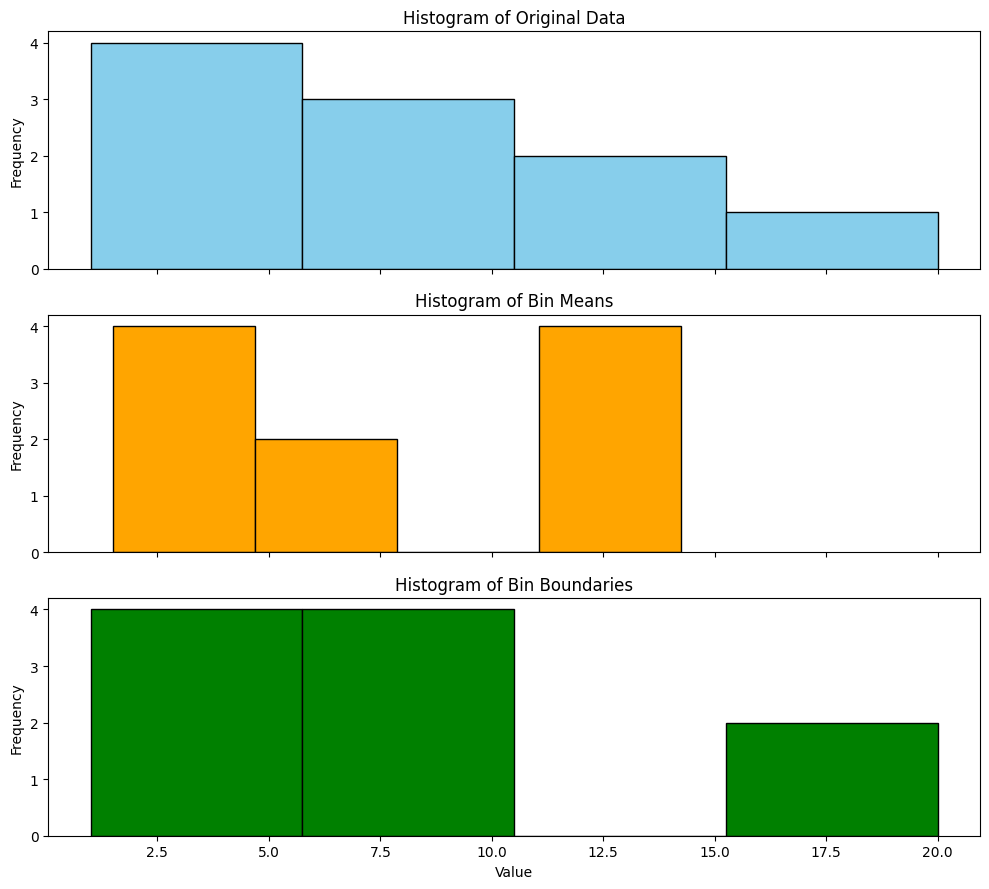

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform equi-depth binning
def equi_depth_binning(data, num_bins):
    sorted_data = sorted(data)
    bin_size = len(data) // num_bins
    bins = [sorted_data[i * bin_size: (i + 1) * bin_size] for i in range(num_bins - 1)]
    bins.append(sorted_data[(num_bins - 1) * bin_size:])
    return bins

# Replace each value in the bin with the bin mean
def bin_means(bins):
    return [[np.mean(bin)] * len(bin) for bin in bins]

# Replace each value in the bin with the closest boundary
def bin_boundaries(bins):
    new_bins = []
    for bin in bins:
        min_val, max_val = min(bin), max(bin)
        new_bins.append([min_val if x < (min_val + max_val) / 2 else max_val for x in bin])
    return new_bins

# Function to plot histograms
def plot_separate_histograms(data, bins, mean_bins, boundary_bins):
    # Flatten the bins for mean and boundary bins
    flattened_means = [val for bin in mean_bins for val in bin]
    flattened_boundaries = [val for bin in boundary_bins for val in bin]

    # Create subplots for three histograms with reduced height
    fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

    # Histogram for original data
    axs[0].hist(data, bins=len(bins), color='skyblue', edgecolor='black')
    axs[0].set_title("Histogram of Original Data")
    axs[0].set_ylabel("Frequency")

    # Histogram for bin means
    axs[1].hist(flattened_means, bins=len(bins), color='orange', edgecolor='black')
    axs[1].set_title("Histogram of Bin Means")
    axs[1].set_ylabel("Frequency")

    # Histogram for bin boundaries
    axs[2].hist(flattened_boundaries, bins=len(bins), color='green', edgecolor='black')
    axs[2].set_title("Histogram of Bin Boundaries")
    axs[2].set_xlabel("Value")
    axs[2].set_ylabel("Frequency")

    plt.tight_layout()

    # Bold visualization section title
    print("\n\033[1mVisualization Graph:\033[0m")
    plt.show()

# ====== Main Program ======

# User input
print("\033[1mProgram Input:\033[0m")
data = list(map(float, input("Enter the data values separated by spaces: ").split()))
num_bins = int(input("Enter the number of bins: "))

# Equi-depth bins
bins = equi_depth_binning(data, num_bins)

# Transformed bins
mean_bins = bin_means(bins)
boundary_bins = bin_boundaries(bins)

# Bold program output title
print("\n\033[1mProgram Output:\033[0m")
print("Original Data:", data)
print("Equi-depth Bins:", bins)
print("Bins with Means:", mean_bins)
print("Bins with Boundaries:", boundary_bins)

# Plot separate histograms
plot_separate_histograms(data, bins, mean_bins, boundary_bins)